# Задания 1 и 2

Для таблицы прагматического слущающего, представленной в задании, можно вывести скалярную импликатуру для высказывания 'шляпа', поскольку вероятность выбора r1 выше, чем r2. Для остальных высказываний стимул выбирается на основании условия истинности, так как 'очки' верно только для r3, 'усы' -- для r2.

In [5]:
import numpy as np
import pandas as pd


class RSA:
    """Implementation of the core Rational Speech Acts model.

    Parameters
    ----------
    lexicon : `np.array` or `pd.DataFrame`
        Messages along the rows, states along the columns.
    prior : array-like
        Same length as the number of colums in `lexicon`.
    costs : array-like
        Same length as the number of rows in `lexicon`.
    alpha : float
        Default: 1.0
    """
    def __init__(self, lexicon, prior, costs, alpha=1.0):
        self.lexicon = lexicon
        self.prior = np.array(prior)
        self.costs = np.array(costs)
        self.alpha = alpha

    def literal_listener(self):
        """Literal listener predictions, which corresponds intuitively
        to truth conditions with priors.

        Returns
        -------
        np.array or pd.DataFrame, depending on `self.lexicon`.
        The rows correspond to messages, the columns to states.

        """
        return rownorm(self.lexicon * self.prior)
    def speaker(self):
        """Returns a matrix of pragmatic speaker predictions.

        Returns
        -------
        np.array or pd.DataFrame, depending on `self.lexicon`.
        The rows correspond to states, the columns to states.
        """
        lit = self.literal_listener().T
        utilities = self.alpha * (safelog(lit) + self.costs)
        return rownorm(np.exp(utilities))

    def listener(self):
        """Returns a matrix of pragmatic listener predictions.

        Returns
        -------
        np.array or pd.DataFrame, depending on `self.lexicon`.
        The rows correspond to messages, the columns to states.
        """
        speaker = self.speaker().T
        return rownorm(speaker * self.prior)
def rownorm(mat):
    """Row normalization of np.array or pd.DataFrame"""
    return (mat.T / mat.sum(axis=1)).T


def safelog(vals):
    """Silence distracting warnings about log(0)."""
    with np.errstate(divide='ignore'):
        return np.log(vals)


if __name__ == '__main__':
    """Example from the class slides"""

    from IPython.display import display


    def display_reference_game(mod):
        d = mod.lexicon.copy()
        d['costs'] = mod.costs
        d.loc['prior'] = list(mod.prior) + [""]
        d.loc['alpha'] = [mod.alpha] + [" "] * mod.lexicon.shape[1]
        display(d)
    # Core lexicon:
    msgs = ['шляпа', 'очки', 'усы']
    states = ['r1', 'r2', 'r3']
    lex = pd.DataFrame([
        [1.0, 1.0, 0],
        [0, 0, 1.0],
        [0, 1.0, 0]], index=msgs, columns=states)

    print("="*70 + "\nDifferent priors and all-0 message costs\n")
    basic_mod = RSA(lexicon=lex, prior=[0.1, 0.45, 0.45], costs=[0.0, 0.0, 0.0])

    display_reference_game(basic_mod)

    print("\nLiteral listener")
    display(basic_mod.literal_listener())

    print("\nPragmatic speaker")
    display(basic_mod.speaker())

    print("\nPragmatic listener")
    display(basic_mod.listener())

Different priors and all-0 message costs



,r1,r2,r3,costs
шляпа,1.0,1.0,0.0,0.0
очки,0.0,0.0,1.0,0.0
усы,0.0,1.0,0.0,0.0
prior,0.1,0.45,0.45,
alpha,1.0,,,



Literal listener


,r1,r2,r3
шляпа,0.181818,0.818182,0.0
очки,0.000000,0.000000,1.0
усы,0.000000,1.000000,0.0



Pragmatic speaker


,шляпа,очки,усы
r1,1.00,0.0,0.00
r2,0.45,0.0,0.55
r3,0.00,1.0,0.00



Pragmatic listener


,r1,r2,r3
шляпа,0.330579,0.669421,0.0
очки,0.000000,0.000000,1.0
усы,0.000000,1.000000,0.0


Если уменьшить исходную вероятность P(r1) до 0.1, а исходные вероятности P(r2) и P(r3) увеличить до 0.45, скалярная импликатура меняется для высказывания 'шляпа' -- будет выбран стимул r2, а не r1. Это происходит потому, что для прагматического слушателя выбор стимула r2 рациональнее, чем r1, поскольку исходная вероятность выбора r2 говорящим выше. С точки зрения вычислений исходная вероятность влияет на нормализацию значений столбцов. 

# Задание 3

#### Игра 1

Рассмотрим референциальную игру, которая была в конце семинара. Пусть есть три высказывания 'квадрат', 'зеленый', 'синий', тогда можно вычислить две скалярные импликатуры (см. таблицу для прагматического слушателя ниже)

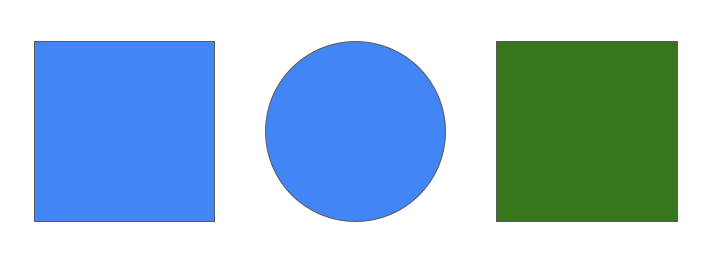

Импликатуры: 

квадрат -> r1 (синий квадрат)

синий -> r2 (синий круг)

In [2]:

if __name__ == '__main__':
    """Example from the class slides"""

    from IPython.display import display


    def display_reference_game(mod):
        d = mod.lexicon.copy()
        d['costs'] = mod.costs
        d.loc['prior'] = list(mod.prior) + [""]
        d.loc['alpha'] = [mod.alpha] + [" "] * mod.lexicon.shape[1]
        display(d)
    # Core lexicon:
    msgs = ['квадрат', 'зеленый', 'синий']
    states = ['r1', 'r2', 'r3']
    lex = pd.DataFrame([
        [1.0, 0, 1.0],
        [0, 0, 1.0],
        [1.0, 1.0, 0]], index=msgs, columns=states)

    print("="*70 + "\nEven priors and all-0 message costs\n")
    basic_mod = RSA(lexicon=lex, prior=[1/3, 1/3, 1/3], costs=[0.0, 0.0, 0.0])

    display_reference_game(basic_mod)

    print("\nLiteral listener")
    display(basic_mod.literal_listener())

    print("\nPragmatic speaker")
    display(basic_mod.speaker())

    print("\nPragmatic listener")
    display(basic_mod.listener())

Even priors and all-0 message costs



,r1,r2,r3,costs
квадрат,1.000000,0.0,1.0,0.0
зеленый,0.000000,0.0,1.0,0.0
синий,1.000000,1.0,0.0,0.0
prior,0.333333,0.333333,0.333333,
alpha,1.000000,,,



Literal listener


,r1,r2,r3
квадрат,0.5,0.0,0.5
зеленый,0.0,0.0,1.0
синий,0.5,0.5,0.0



Pragmatic speaker


,квадрат,зеленый,синий
r1,0.500000,0.000000,0.5
r2,0.000000,0.000000,1.0
r3,0.333333,0.666667,0.0



Pragmatic listener


,r1,r2,r3
квадрат,0.600000,0.000000,0.4
зеленый,0.000000,0.000000,1.0
синий,0.333333,0.666667,0.0


## Роль цены высказывания

Параметр "цена высказывания" отвечает за маркированность определенного высказывания. Если увеличить этот параметр, высказывание станет слишком маркированным и не будет "соревноваться" с другими, и скалярную импликатуру нельзя будет вывести.

In [119]:
if __name__ == '__main__':
    """Example from the class slides"""

    from IPython.display import display


    def display_reference_game(mod):
        d = mod.lexicon.copy()
        d['costs'] = mod.costs
        d.loc['prior'] = list(mod.prior) + [""]
        d.loc['alpha'] = [mod.alpha] + [" "] * mod.lexicon.shape[1]
        display(d)
    # Core lexicon:
    msgs = ['квадрат', 'зеленый', 'синий']
    states = ['r1', 'r2', 'r3']
    lex = pd.DataFrame([
        [1.0, 0, 1.0],
        [0, 0, 1.0],
        [1.0, 1.0, 0]], index=msgs, columns=states)
    d = {}
    b = {}
    for c in range(1, 10):
        basic_mod = RSA(lexicon=lex, prior=[1/3, 1/3, 1/3], costs=[c, 0.0, 0.0])
        d[c] = basic_mod.listener()['r2'][2]
        b[c] = basic_mod.listener()['r1'][0]

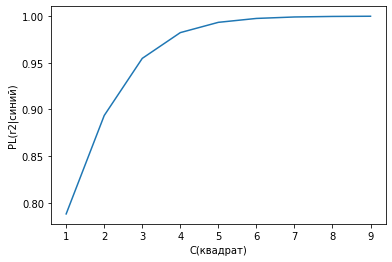

In [120]:
import matplotlib.pyplot as plt

plt.xlabel('C(квадрат)')
plt.ylabel('PL(r2|синий)')
plt.plot(d.keys(), d.values())
plt.show()

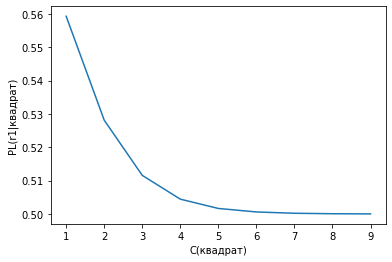

In [101]:
plt.xlabel('C(квадрат)')
plt.ylabel('PL(r1|квадрат)')
plt.plot(b.keys(), b.values())
plt.show()

Видно, что на втором графике при увеличении параметра цены высказывания 'квадрат' вероятность r1(квадрат) стремится к 0.5, то есть импликатура 'квадрат' -> 'синий квадрат' становится менее сильной и в итоге не выводится вовсе. На первом графике при увеличении этого параметра вероятность выбора r2 при высказывании 'синий' увеличивается, то есть импликатура 'синий' -> 'синий круг' становится более сильной, а 'синий', по мнению прагматического слушающего, не отсылает к синему квадрату. Как я уже говорила, так происходит из-за того, что высказывание 'квадрат' воспринимается как очень маркированное, и прагматический слушатель делает вывод, что настолько маркированное высказывание скорее не будет использовано. 

## Роль оптимальности альфа

Параметр альфа отражает степень влияния прагматики на выбор стимула, соответствующего высказыванию. Это значит, что при его увеличении прагматический слушатель становится рациональнее и с большей вероятностью выбирает прагматически рациональный вариант.

In [93]:
if __name__ == '__main__':
    """Example from the class slides"""

    from IPython.display import display


    def display_reference_game(mod):
        d = mod.lexicon.copy()
        d['costs'] = mod.costs
        d.loc['prior'] = list(mod.prior) + [""]
        d.loc['alpha'] = [mod.alpha] + [" "] * mod.lexicon.shape[1]
        display(d)
    # Core lexicon:
    msgs = ['квадрат', 'зеленый', 'синий']
    states = ['r1', 'r2', 'r3']
    lex = pd.DataFrame([
        [1.0, 0, 1.0],
        [0, 0, 1.0],
        [1.0, 1.0, 0]], index=msgs, columns=states)

    d = {}
    b = {}
    for a in range(1,11):
        basic_mod = RSA(lexicon=lex, prior=[1/3, 1/3, 1/3], costs=[0.0, 0.0, 0.0], alpha=a)
        d[a] = basic_mod.listener()['r1'][0]
        b[a] = basic_mod.listener()['r1'][2]

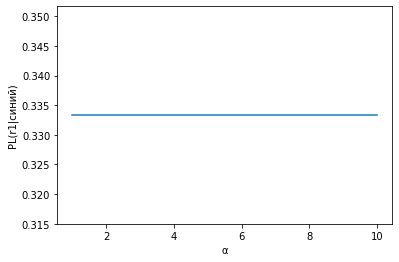

In [94]:
plt.xlabel('α')
plt.ylabel('PL(r1|синий)')
plt.plot(b.keys(), b.values())
plt.show()

Судя по графику выше, параметр альфа не влияет на импликатуру 'синий' -> r2 (синий круг), видимо, потому что это в целом наиболее оптимальный выбор из возможных стимулов.

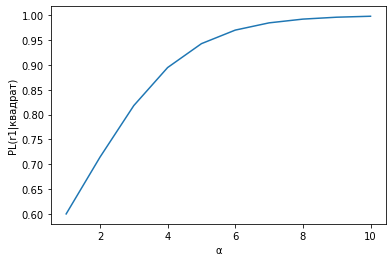

In [95]:
plt.xlabel('α')
plt.ylabel('PL(r1|квадрат)')
plt.plot(d.keys(), d.values())
plt.show()

Выше представлен график зависимости вероятности выбора r1 для высказывания 'квадрат' от параметра альфа: видно, что чем больше альфа, тем вероятнее, что стимул r1 (синий квадрат) будет выбран как соответствующий высказыванию 'квадрат'. То есть стимул r3 (зеленый квадрат) будет восприниматься как менее оптимальный выбор, так как он отличается по цвету. Значит, скалярная импликатура становится сильнее с увеличением параметра альфа.

## Роль исходной вероятности

In [126]:
if __name__ == '__main__':
    """Example from the class slides"""

    from IPython.display import display


    def display_reference_game(mod):
        d = mod.lexicon.copy()
        d['costs'] = mod.costs
        d.loc['prior'] = list(mod.prior) + [""]
        d.loc['alpha'] = [mod.alpha] + [" "] * mod.lexicon.shape[1]
        display(d)
    # Core lexicon:
    msgs = ['квадрат', 'зеленый', 'синий']
    states = ['r1', 'r2', 'r3']
    lex = pd.DataFrame([
        [1.0, 0, 1.0],
        [0, 0, 1.0],
        [1.0, 1.0, 0]], index=msgs, columns=states)
    
    probs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    d = {}
    b = {}
    for p in probs:
        basic_mod = RSA(lexicon=lex, prior=[ p, (1 - p) / 2, (1 - p) / 2], costs=[0.0, 0.0, 0.0])
        d[p] = basic_mod.listener()['r1'][0]
        b[p] = basic_mod.listener()['r2'][2]

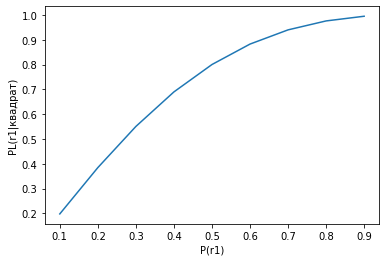

In [127]:
plt.xlabel('P(r1)')
plt.ylabel('PL(r1|квадрат)')
plt.plot(d.keys(), d.values())
plt.show()

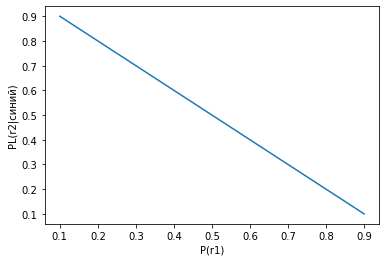

In [128]:
plt.xlabel('P(r1)')
plt.ylabel('PL(r2|синий)')
plt.plot(b.keys(), b.values())
plt.show()

Исходная вероятность влияет на релевантность референта (стимула) с точки зрения участников дискурса, т.е. говорящего и прагматического слушателя. Если эта вероятность уменьшается, референт становится менее значимым, что может влиять на импликатуры: например, при исходной вероятности r1 меньше 0.3 скалярная импликатура 'квадрат' -> r1 (синий квадрат) исчезает, а при увеличении этой вероятности импликатура становится сильнее. Вторая импликатура, 'синий' -> r2 (синий круг) пропадает при исходной вероятности r1 более 0.5; когда эта вероятность уменьшается, импликатура становится сильнее. Обе импликатуры существуют, если значение исходной вероятности r1 находится в пределах от 0.3 до 0.5

#### Игра 2

Высказывания для второй референциальной игры:
* очки
* усы 
* шляпа

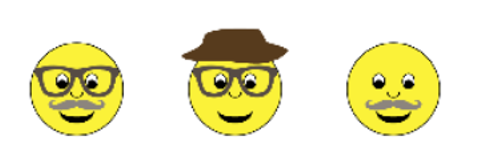

In [129]:

if __name__ == '__main__':
    """Example from the class slides"""

    from IPython.display import display


    def display_reference_game(mod):
        d = mod.lexicon.copy()
        d['costs'] = mod.costs
        d.loc['prior'] = list(mod.prior) + [""]
        d.loc['alpha'] = [mod.alpha] + [" "] * mod.lexicon.shape[1]
        display(d)
    # Core lexicon:
    msgs = ['очки', 'усы', 'шляпа']
    states = ['r1', 'r2', 'r3']
    lex = pd.DataFrame([
        [1.0, 1.0, 0],
        [1.0, 0, 1.0],
        [0, 1.0, 0]], index=msgs, columns=states)

    print("="*70 + "\nEven priors and all-0 message costs\n")
    basic_mod = RSA(lexicon=lex, prior=[1/3, 1/3, 1/3], costs=[0.0, 0.0, 0.0])

    display_reference_game(basic_mod)

    print("\nLiteral listener")
    display(basic_mod.literal_listener())

    print("\nPragmatic speaker")
    display(basic_mod.speaker())

    print("\nPragmatic listener")
    display(basic_mod.listener())

Even priors and all-0 message costs



,r1,r2,r3,costs
очки,1.000000,1.0,0.0,0.0
усы,1.000000,0.0,1.0,0.0
шляпа,0.000000,1.0,0.0,0.0
prior,0.333333,0.333333,0.333333,
alpha,1.000000,,,



Literal listener


,r1,r2,r3
очки,0.5,0.5,0.0
усы,0.5,0.0,0.5
шляпа,0.0,1.0,0.0



Pragmatic speaker


,очки,усы,шляпа
r1,0.500000,0.5,0.000000
r2,0.333333,0.0,0.666667
r3,0.000000,1.0,0.000000



Pragmatic listener


,r1,r2,r3
очки,0.600000,0.4,0.000000
усы,0.333333,0.0,0.666667
шляпа,0.000000,1.0,0.000000


Подробнее рассмотреть влияние различных параметров я не успела, однако кажется, что в целом результаты будут схожи с выводами для предыдущей референциальной игры.

# Задание 4

Мне сложно предложить конкретные параметры и изменения формулы, но, думаю, теория рационального речевого акта может применяться, например, при исследовании семантики числа в русском: можно было бы посмотреть, в каких ситуациях высказывание в единственном числе может обозначать референта во множественном (например, каким будет выбор для высказывания 'мороженое с вишней', если есть мороженое с одной вишенкой и с несколькими). В английском языке, кажется, выбор более однозначный, поскольку референт в единственном числе требует артикля, а в русском все не очень очевидно. 